# Sentimentanalyse

- folgende Module müssen importiert werden:

In [32]:
import os
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

## Dataframe-Erstellung

- hier werden die Namen der Dateien extrachiert und an eine Liste gegeben:

In [ ]:
pfad = r"pfad\zum\ordner"
os.chdir(pfad)

names=[]
for datei in os.listdir(pfad): 
    f = os.path.join(pfad, datei) 
    if os.path.isfile(f): 
        name, endung=datei.split('.')
        titel = names.append(name)

- der Inhalt der Dateien wird eingelesen und an eine Liste gegeben:

In [ ]:
briefe=[]
for datei in os.listdir(pfad): 
    f = os.path.join(pfad, datei) 
    if os.path.isfile(f): 
        
        with open (f, encoding = "UTF-8") as fh:
            brief = fh.read()
            briefe.append(brief.replace('\n\n', '\n'))

- es wird eine Tabelle erstellt, das drei Spalten haben soll (briefe, name und sentiment):

In [64]:
df = pd.DataFrame(np.array(briefe), columns=['briefe'])

In [66]:
df.insert(loc=0, column='name', value=names)

- Wörterbücher werden eingelesen:

In [ ]:
with open(r"pfad\zur\datei1", encoding='utf-8') as fh:
    sentiment_dict_neg = fh.read().splitlines()
with open(r"pfad\zur\datei2", encoding='utf-8') as fh:
    sentiment_dict_pos = fh.read().splitlines()
print("loaded {} negative words".format(len(sentiment_dict_neg)))
print("loaded {} positive words".format(len(sentiment_dict_pos)))

- Funktion zur Berechung des Sentiments wird eingeführt:

In [10]:
def compute_sentiment(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_negative = 0
    num_positive = 0
    for nw in sentiment_dict_neg:
        num_negative += tokens.count(nw.lower())
    for pw in sentiment_dict_pos:
        num_positive += tokens.count(pw.lower())
    try:
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)
    except ZeroDivisionError:
        sentiment_score = 0
    return sentiment_score

- Funktion zur Berechnung des Sentiments, die auch die Negation im Text berücksichtigt

In [ ]:
def compute_sentiment_neg(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens] 
    num_negative = 0    
    num_positive = 0     
    for i, wort in enumerate(tokens):  
        if wort in sentiment_dict_pos:      
            if  i>0 and tokens[i-1] == 'nicht':  
                num_negative += tokens.count(wort.lower())                
            else:                                   
                num_positive += tokens.count(wort.lower())                  
        elif wort in sentiment_dict_neg:            
                num_positive += tokens.count(wort.lower())                 
            else:                                   
                num_negative += tokens.count(wort.lower())                   
        else:                                      
            wort
    try:                                            
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)  
    except ZeroDivisionError:                      
        sentiment_score = 0
    return sentiment_score

- die Berechnung wird durchgeführt und die Ergebnisse werden an die Tabelle weitergegeben:

In [68]:
df["sentiment"] = df["briefe"].apply(compute_sentiment)

- die Tabelle wird gespeichert:

In [73]:
df.to_pickle("dateiname.p")

- die Statistik aus der Tabelle wird ausgegeben:

In [ ]:
df["sentiment"].describe()

- Pfad zum Ordner, in dem die Visualisierung gespeichert werden soll, und das Format, in dem gespeichert wird, werden angegeben: 

In [75]:
plot_results_dir = r"pfad\zum\plotorder\\"
plot_file_format= "png"

### Attribute Plots

- das Attribut, das analysiert wird, wird angegeben

In [77]:
attribute = "name"

#### Bar Plot

- Erstellung eines Balkendiagramms

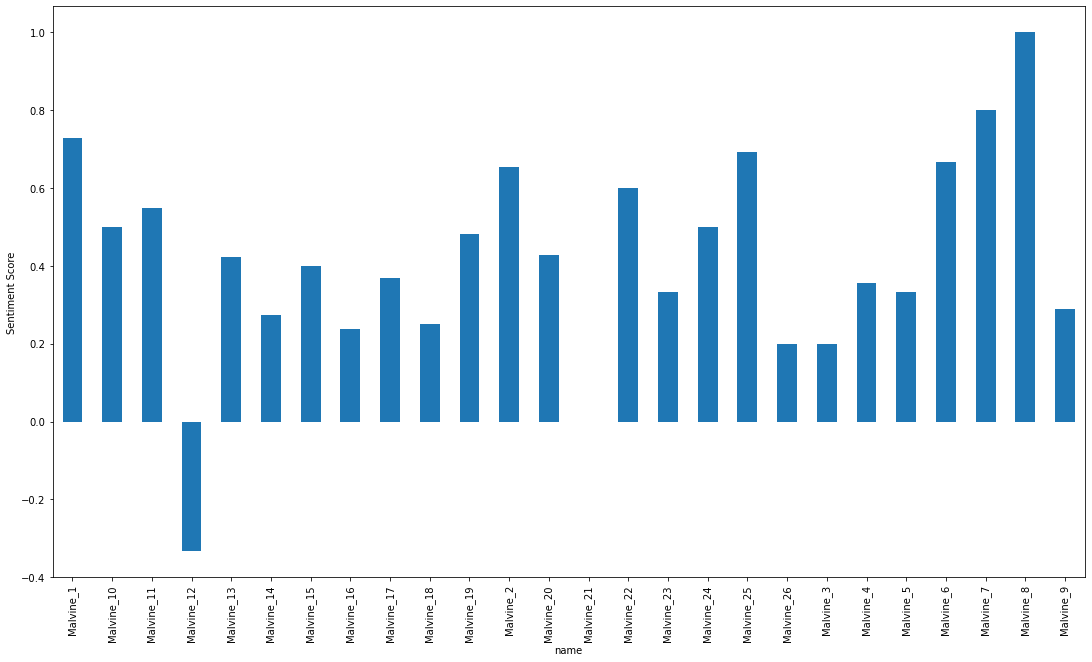

In [78]:
ax = df.groupby(attribute)["sentiment"].mean().plot(kind="bar", ylabel="Sentiment Score")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig("{}{}_bar_plot.{}".format(plot_results_dir, attribute, plot_file_format))
plt.show()
plt.close()

#### Sentiment Words Highlighting

- Visualisierung einzelner Texte - positive und negative Wörter werden fett und farblich markiert dargestellt

In [85]:
text_to_print = df.loc[24, "briefe"]
for nw in sentiment_dict_neg:
    if nw.lower() in text_to_print.lower() and nw not in ["span", "style", "color", "font", "size"]:
        text_to_print = re.sub(r"\b{}\b".format(nw), r"<span style='color:#E74C3C; font-size:20pt'><b>{}</b></span>".format(nw), text_to_print)
        
for pw in sentiment_dict_pos:
    if pw.lower() in text_to_print.lower() and pw not in ["span", "style", "color", "font", "size"]:
        text_to_print = re.sub(r"\b{}\b".format(pw), r"<span style='color:#27AE60; font-size:20pt'><b>{}</b></span>".format(pw), text_to_print)

HTML(text_to_print)